In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
print("matplotlib",plt.matplotlib.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
seaborn 0.13.2
matplotlib 3.10.0
sklearn 1.6.1


In [ ]:
df = pd.read_csv("/content/exercise.csv")

In [ ]:
df.head()

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,Duration
0,male,68,190,94,105,40.8,231,29
1,female,20,166,60,94,40.3,66,14
2,male,69,179,79,88,38.7,26,5
3,female,34,179,71,100,40.5,71,13
4,female,27,154,58,81,39.8,35,10


In [ ]:
df.describe()

,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,Duration
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,95.518533,40.025453,89.539533,15.530600
std,16.980264,14.258114,15.035657,9.583328,0.779230,62.456978,8.319203
min,20.000000,123.000000,36.000000,67.000000,37.100000,1.000000,1.000000
25%,28.000000,164.000000,63.000000,88.000000,39.600000,35.000000,8.000000
50%,39.000000,175.000000,74.000000,96.000000,40.200000,79.000000,16.000000
75%,56.000000,185.000000,87.000000,103.000000,40.600000,138.000000,23.000000
max,79.000000,222.000000,132.000000,128.000000,41.500000,314.000000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  int64  
 3   Weight      15000 non-null  int64  
 4   Heart_Rate  15000 non-null  int64  
 5   Body_Temp   15000 non-null  float64
 6   Calories    15000 non-null  int64  
 7   Duration    15000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Heart_Rate,0
Body_Temp,0
Calories,0
Duration,0


Data Analysis

In [ ]:
# get some statistical measures about the data
df.describe()

,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,Duration
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,95.518533,40.025453,89.539533,15.530600
std,16.980264,14.258114,15.035657,9.583328,0.779230,62.456978,8.319203
min,20.000000,123.000000,36.000000,67.000000,37.100000,1.000000,1.000000
25%,28.000000,164.000000,63.000000,88.000000,39.600000,35.000000,8.000000
50%,39.000000,175.000000,74.000000,96.000000,40.200000,79.000000,16.000000
75%,56.000000,185.000000,87.000000,103.000000,40.600000,138.000000,23.000000
max,79.000000,222.000000,132.000000,128.000000,41.500000,314.000000,30.000000


Data Visualization

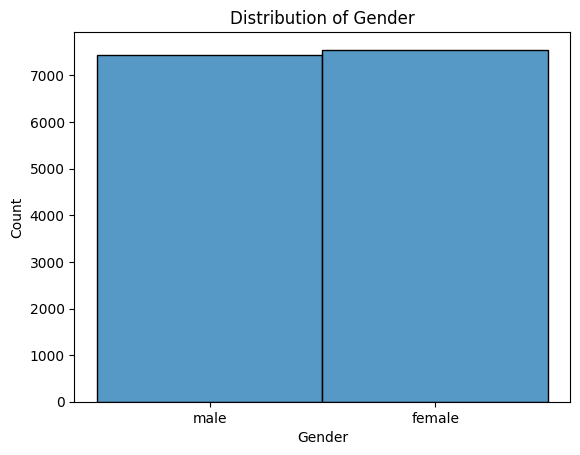

In [ ]:
plt.figure()
sns.histplot(df['Gender'])
plt.title(f'Distribution of Gender')
plt.show()

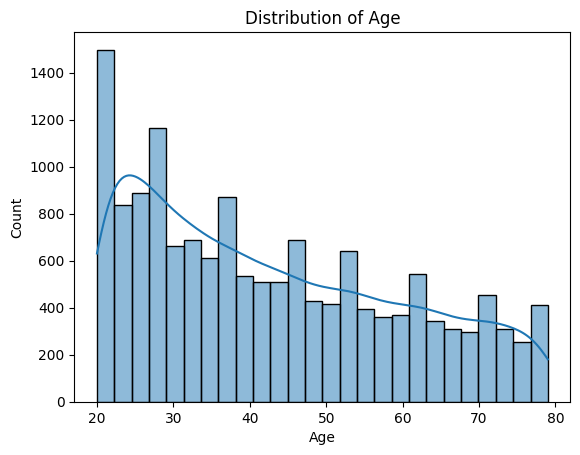

In [ ]:
plt.figure()
sns.histplot(df['Age'], kde=True)
plt.title(f'Distribution of Age')
plt.show()

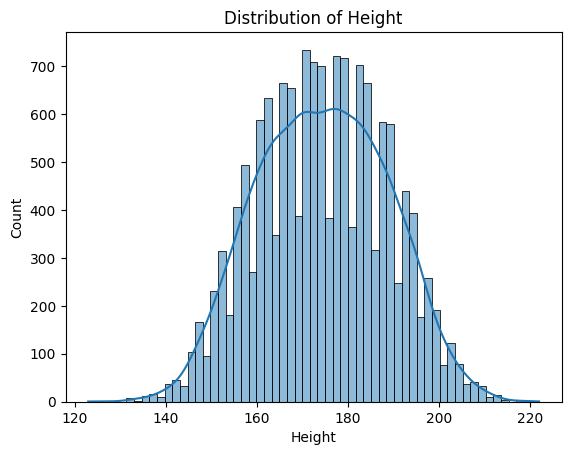

In [ ]:
plt.figure()
sns.histplot(df['Height'], kde=True)
plt.title(f'Distribution of Height')
plt.show()

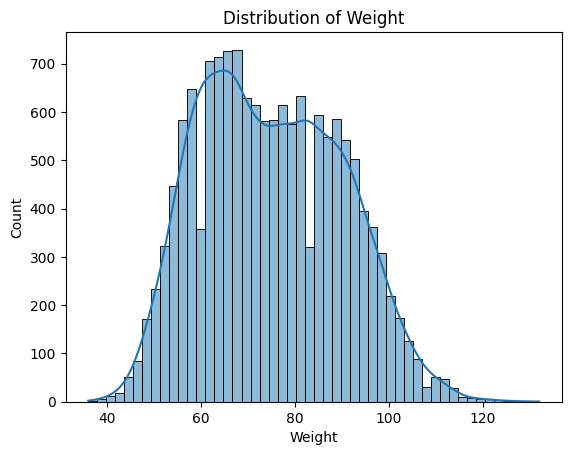

In [ ]:
plt.figure()
sns.histplot(df['Weight'], kde=True)
plt.title(f'Distribution of Weight')
plt.show()

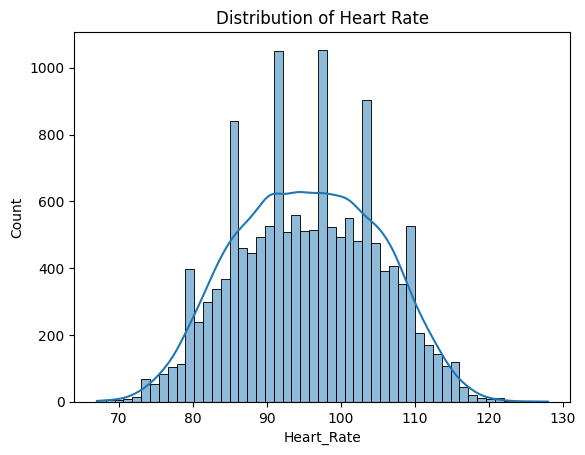

In [ ]:
plt.figure()
sns.histplot(df['Heart_Rate'], kde=True)
plt.title(f'Distribution of Heart Rate')
plt.show()

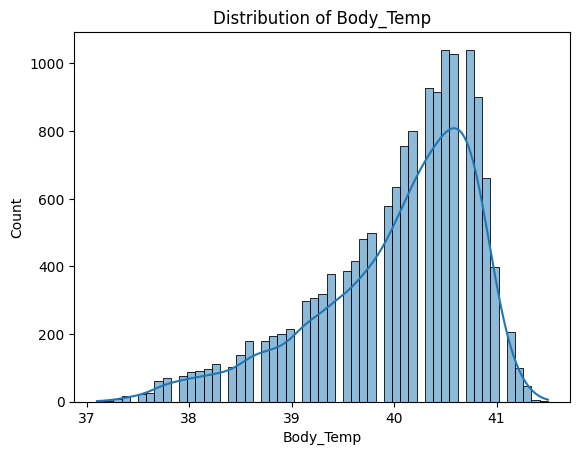

In [ ]:
plt.figure()
sns.histplot(df['Body_Temp'], kde=True)
plt.title(f'Distribution of Body_Temp')
plt.show()

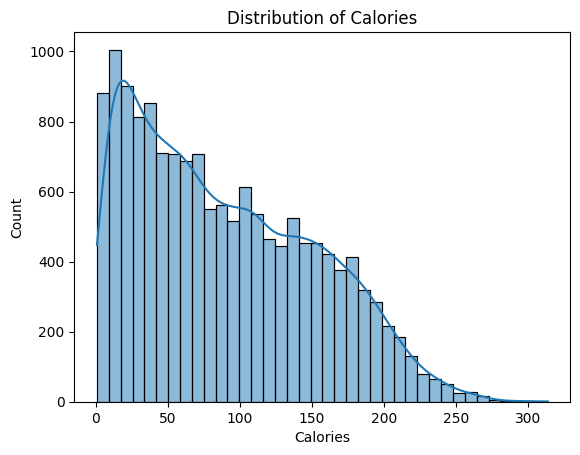

In [ ]:
plt.figure()
sns.histplot(df['Calories'], kde=True)
plt.title(f'Distribution of Calories')
plt.show()

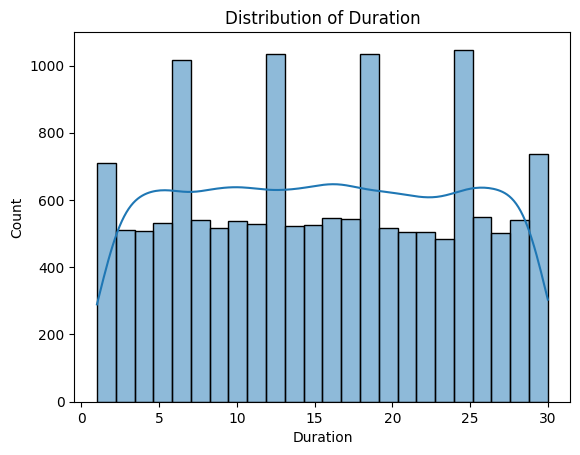

In [ ]:
plt.figure()
sns.histplot(df['Duration'], kde=True)
plt.title(f'Distribution of Duration')
plt.show()

In [ ]:
# Encode categorical variable 'Gender'
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})

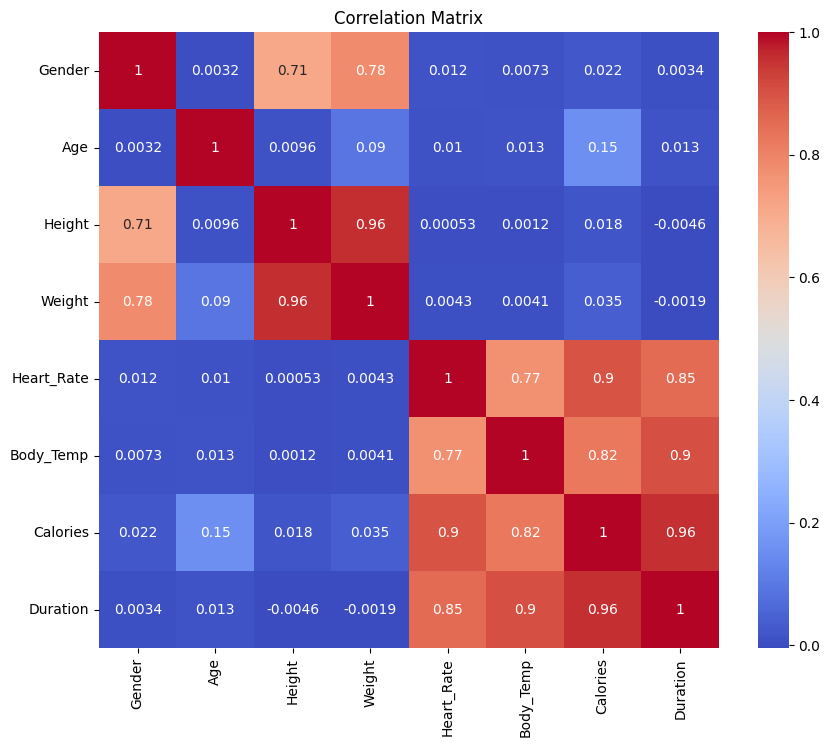

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature/target split
X = df.drop('Duration', axis=1)
y = df['Duration']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestRegressor(random_state=42)

# # GridSearchCV setup
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='r2',
#                            n_jobs=-1,
#                            verbose=2)

# # Fit grid search
# grid_search.fit(X_train, y_train)

# # Best estimator
# best_rf = grid_search.best_estimator_
# print("Best parameters: ", grid_search.best_params_)

In [ ]:
# Set Random Forest parameters from grid search results
rf = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.332291133086891
R-squared: 0.9952714543828778


In [ ]:
# After fitting your rf model
print("max_depth:", rf.max_depth)
print("n_estimators:", rf.n_estimators)
print("min_samples_split:", rf.min_samples_split)
print("min_samples_leaf:", rf.min_samples_leaf)
print("max_features:", rf.max_features)
print("bootstrap:", rf.bootstrap)
print("oob_score:", rf.oob_score)

max_depth: 20
n_estimators: 200
min_samples_split: 2
min_samples_leaf: 1
max_features: 1.0
bootstrap: True
oob_score: False


In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(rf,file)